In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('../data/meteo_2021.csv')
df.head()

,nb,date,temp,wind,rain,Dayweek,Month
0,8255,2021-04-09,10.68,4.25,0.11,Friday,4
1,16889,2021-04-10,10.12,3.52,0.00,Saturday,4
2,13475,2021-04-11,9.83,4.33,0.92,Sunday,4
3,9508,2021-04-12,7.28,4.47,0.27,Monday,4
4,13433,2021-04-13,6.45,2.21,0.01,Tuesday,4


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [4]:
X = df.iloc[:, [2, 3, 4, 6]].values
y = df.iloc[:, 0].values
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=.8, random_state=2)

In [5]:
def regressionPolynomial(Xtrain,ytrain,n=1):
    transformer = PolynomialFeatures(degree=n, include_bias=False)
    transformer.fit(Xtrain)
    x_ = transformer.transform(Xtrain)
    model = LinearRegression().fit(x_, ytrain)
    score = model.score(x_,ytrain)
    return model, transformer, score
def testR(model, t,Xtest, ytest, n=1):
    xtest = t.transform(Xtest)
    score = model.score(xtest, ytest)
    return score

In [6]:
m1, t1, s1 = regressionPolynomial(Xtrain,ytrain)
m2, t2, s2 = regressionPolynomial(Xtrain,ytrain, n=2)
m3, t3, s3 = regressionPolynomial(Xtrain,ytrain, n=3)
print(s1,s2,s3)

0.602150875417117 0.711799890221261 0.7811734836356553


In [7]:
import matplotlib.pyplot as plt

<BarContainer object of 3 artists>

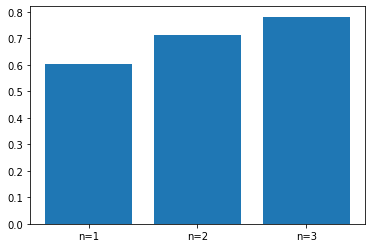

In [8]:
a = [s1,s2,s3]
b = ["n=1","n=2","n=3"]
plt.bar(b,a)

[0.71538381499995, 0.7675540313409368, 0.7652843665159403]


<BarContainer object of 3 artists>

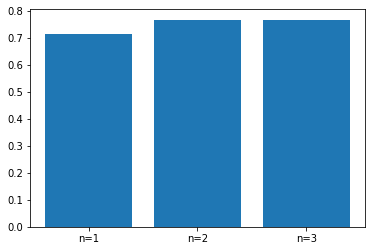

In [9]:
score = [testR(m1, t1, Xtest, ytest,n=1), testR(m2, t2, Xtest, ytest,n=2), testR(m3, t3, Xtest, ytest,n=3)]
print(score)
b = ["n=1","n=2","n=3"]
plt.bar(b,score)

Score très peu élèvés, manque des données ? 
